# Emissions Time Series

This datasets contains tonnes of emissions per person per year provided by the European Commission.

- Dataset url: https://ec.europa.eu/eurostat/databrowser/view/sdg_13_10__custom_19333830/default/table
- Dataset options
    - Geopolitical entity (reporting): All (29/29)
    - Source sectors for greenhouse gas emissions (Common reporting format, UNFCCC)
      - Total (excluding memo items): True
      - Total (excluding LULUCF and memo items): False
    - Time: 1990-2023 (34/34)
    - Time frequency: Annual
    - Unit of measure: Tonnes per capita

- Download options
    - File format: SDMX-CSV 1.0 (.csv)
    - Data scope
    - Include non-available data: False
    - Compress file (.gzip): False
- File path: data/emissions.csv

Time Series length: 34
Years: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Emissions data: Float32[9.6, 8.8, 8.5, 8.6, 9.3, 8.6, 10.2, 9.5, 9.1, 8.1, 8.5, 7.7, 7.1, 7.4, 7.4, 6.7, 7.6, 7.6, 6.1, 5.8, 6.0, 5.8, 5.8, 6.5, 6.9, 7.6, 7.7, 7.1, 7.6, 8.0, 6.3, 7.3, 7.4, 5.7]
Pacf input vals: Float32[9.6, 8.8, 8.5, 8.6, 9.3, 8.6, 10.2, 9.5, 9.1, 8.1, 8.5, 7.7, 7.1, 7.4, 7.4, 6.7, 7.6, 7.6, 6.1, 5.8, 6.0, 5.8, 5.8, 6.5, 6.9, 7.6, 7.7, 7.1, 7.6, 8.0, 6.3, 7.3, 7.4, 5.7] and lags: 0:10


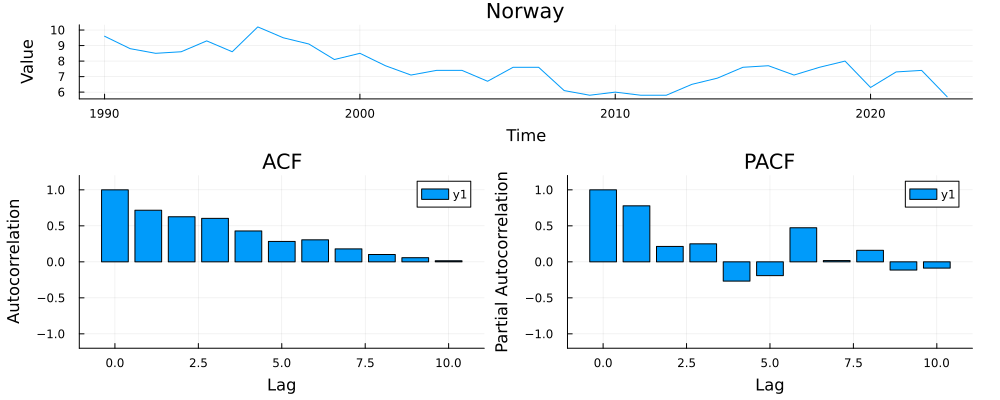

In [20]:
using TimeSeriesKit
using StatsBase
using Plots

# Create TimeSeries
ts = TimeSeries("data/emissions.csv", "Norway")

println("Time Series length: $(length(ts))")
println("Years: $(ts.timestamps)")
println("Emissions data: $(ts.values)")
plot_acf_pacf(ts, lags=10)

The ACF suggests that solution could be an AR model or a linear one.
## Linear model with sliding window of 2

RMSE: 1.1804394169180794


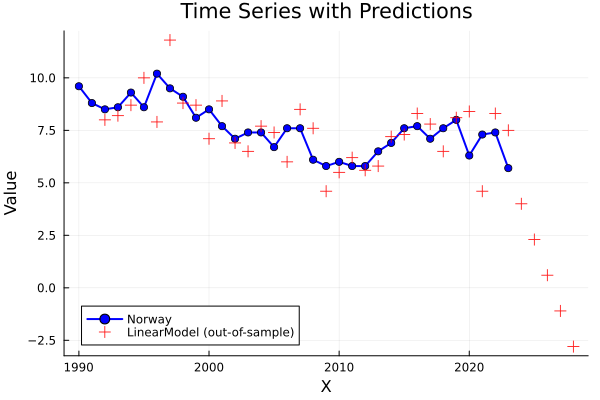

In [ ]:
# Fit a Linear model
linear = LinearModel(sliding_window=2)

predictions = iterative_predict(linear, ts, 5)
println("RMSE: $(rmse(ts, predictions))")

plot_timeseries(ts, predictions)

## Perform Parameter Search

In [19]:
using TimeSeriesKit
configs = Dict(
    RidgeModel => Dict(:λ => [0.9, 0.99], :sliding_window => [5, 7, 10]),  # No parameters to tune
    LinearModel => Dict(:sliding_window => [3, 5, 7]),
    SESModel => Dict(:alpha => [ 0.5, 0.7, 0.9]),
    ARModel => Dict(:p => [1, 2, 3]),
)
result = grid_search(configs, ts, 5, verbose=false)
best_model = result.best_model
println("Best model: $best_model")
result.results_df

Best model: SESModel(0.9, ModelState(Dict{Symbol, Any}(:alpha => 0.9, :level => 5.868165397062024), [9.600000381469727, 9.600000381469727, 8.88000020980835, 8.538000020980835, 8.593800345420838, 9.229380206203462, 8.6629383639431, 10.046293664732932, 9.554629366473293, 9.145463279970084, 8.204546671319763, 8.470454667131976, 7.7770452950518205, 7.167704443674493, 7.376770530198137, 7.3976771388505025, 6.769767542223674, 7.5169766683916786, 7.5916975810084795, 6.24916967227016, 5.844917138888393, 5.98449171388884, 5.818449343050261, 5.801845105966404, 6.430184510596641, 6.853018536890352, 7.5253017678583465, 7.682530005124457, 7.158252914681757, 7.555825205637487, 7.955582520563748, 6.465558423717752, 7.216556014033152, 7.381655687234003], [0.0, -0.8000001907348633, -0.38000020980834925, 0.06200036048889146, 0.7061998453140248, -0.6293798247337357, 1.5370614453220366, -0.5462936647329322, -0.4546289850035663, -1.0454628985003573, 0.295453328680237, -0.7704548578668398, -0.67704539041925

Row,model,mean_rmse,std_rmse,mean_mae,std_mae,params,fitted_params
,String,Float64,Float64,Float64,Float64,String,String
1,SESModel,0.912262,0.342436,0.784169,0.319862,alpha=0.9,"alpha=0.9, level=5.8682"
2,SESModel,0.939879,0.31952,0.812691,0.290444,alpha=0.7,"alpha=0.7, level=6.1865"
3,SESModel,0.998407,0.32283,0.879863,0.279385,alpha=0.5,"alpha=0.5, level=6.4882"
4,ARModel,1.03511,0.417578,0.890382,0.394471,p=1,"coefficients=[0.7784], intercept=1.5753"
5,ARModel,1.0692,0.378941,0.925623,0.406215,p=2,"coefficients=[0.6101, 0.2143], intercept=1.2198"
6,LinearModel,1.18752,0.656744,1.09565,0.686316,sliding_window=3,"intercept=174.8192, slope=-0.0833"
7,LinearModel,1.18752,0.656744,1.09565,0.686316,sliding_window=5,"intercept=174.8192, slope=-0.0833"
8,LinearModel,1.19316,0.418851,1.09017,0.353782,sliding_window=7,"intercept=174.8192, slope=-0.0833"
9,ARModel,1.24921,0.587902,1.13008,0.642653,p=3,"coefficients=[0.5537, 0.0551, 0.25], intercept=0.942"


## Best Model

Selected model SESModel(0.9, ModelState(Dict{Symbol, Any}(:alpha => 0.9, :level => 5.868165397062024), [9.600000381469727, 9.600000381469727, 8.88000020980835, 8.538000020980835, 8.593800345420838, 9.229380206203462, 8.6629383639431, 10.046293664732932, 9.554629366473293, 9.145463279970084, 8.204546671319763, 8.470454667131976, 7.7770452950518205, 7.167704443674493, 7.376770530198137, 7.3976771388505025, 6.769767542223674, 7.5169766683916786, 7.5916975810084795, 6.24916967227016, 5.844917138888393, 5.98449171388884, 5.818449343050261, 5.801845105966404, 6.430184510596641, 6.853018536890352, 7.5253017678583465, 7.682530005124457, 7.158252914681757, 7.555825205637487, 7.955582520563748, 6.465558423717752, 7.216556014033152, 7.381655687234003], [0.0, -0.8000001907348633, -0.38000020980834925, 0.06200036048889146, 0.7061998453140248, -0.6293798247337357, 1.5370614453220366, -0.5462936647329322, -0.4546289850035663, -1.0454628985003573, 0.295453328680237, -0.7704548578668398, -0.67704539041

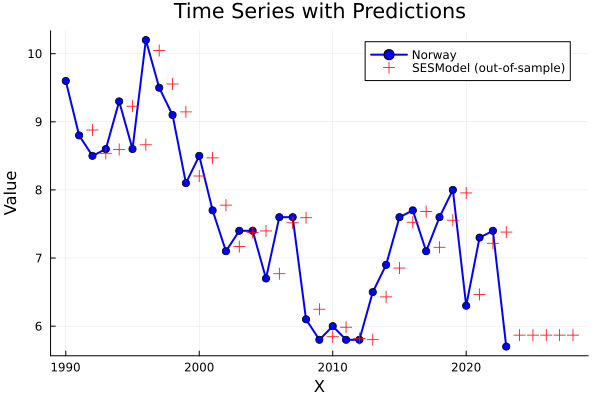

In [40]:

println("Selected model $best_model)")

predictions = iterative_predict(best_model, ts, 5)

cross_validate_rmse = cross_validate(best_model, ts, 5).mean_rmse
println("Cross-validated RMSE: $cross_validate_rmse")

plot_timeseries(ts, predictions)

# Another examples
## AR(2) On Random Walk

Cross-validated RMSE: 1.9133482230023986
TimeSeries{Float64}([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [-0.03649084836934076, 0.40807383253046786, -0.6342189973171017, -1.4949441499605245, -1.6767194495475448, 0.43011334405453233, -0.6395461416247185, -0.6224151173317832, 0.8673150266140689, 0.805733322480331, -0.282692866740427, -0.34588822951132986, -0.18720149790937668, -0.7947934037145438, -0.22498341640183556, 0.3523357240370418, -0.8727344821831045, -1.106751158924884, -1.9070008163785006, -1.0858247613512904, -0.28219862622059183, 0.3016636117997991, 1.861164574339924, 1.5377925009521003, 1.129612667774741, 2.774948805544776, 4.63598

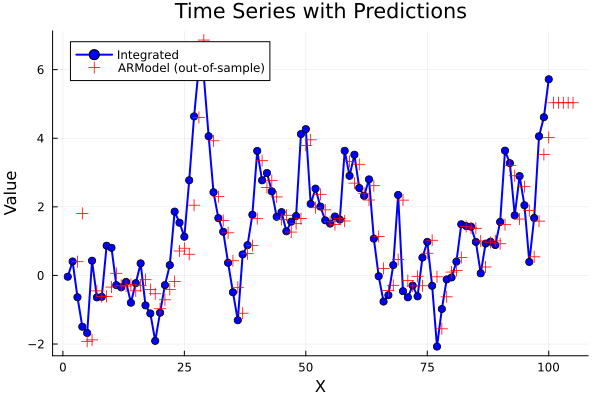

In [47]:
ar = ARModel(p=1)

white = integrate(TimeSeries(randn(100)))

predictions = iterative_predict(ar, white, 5)
cross_validate_rmse = cross_validate(ar, white, 5).mean_rmse
println("Cross-validated RMSE: $cross_validate_rmse")
println(white)
plot_timeseries(white, predictions)

# ARIMA Model Test

ARIMA(1,1,1) fitted successfully
Parameters: Dict{Symbol, Any}(:original_values => [0.0, 0.5880291430752791, 3.469023048950014, 4.831145867509206, 4.489820084198794, 3.9405094577617197, 2.201695676800834, -0.5424940281403696, -3.350676228352418, -6.305168845230561, -8.619122031969425, -10.617905801894697, -12.557761631422421, -14.228178279693536, -17.1146740835283, -20.785953899319086, -23.70553070145534, -24.2553501344692, -23.359275964304093, -23.702515403969976, -26.38802553586192, -29.63372434342732, -32.438788366715514, -32.821402807141595, -30.92533532918703, -30.18670845429859, -31.43958662740389, -32.33285147145979, -32.24830696201412, -34.124813656429325, -37.59883009225511, -40.50667836319723, -41.80431868928607, -42.29521933733621, -42.50246100185425, -41.53689780151168, -42.229408809055975, -42.39311407825622, -40.866427630543946, -41.6373819339731, -42.66217377994599, -43.810791076498965, -46.57566237934753, -49.31793292060838, -51.36092540802734, -53.21721567590102, -54.2

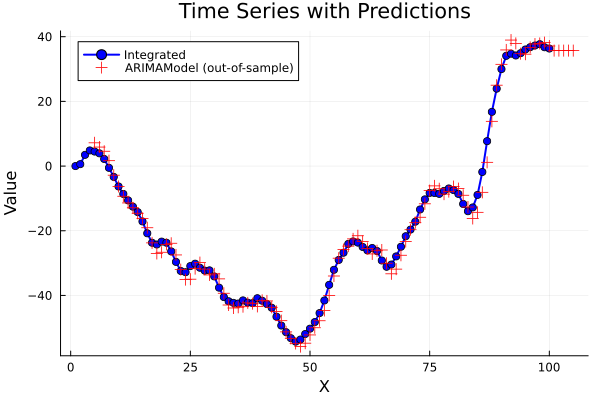

In [51]:
# Test ARIMA model
# Generate ARMA(1) data with trend
data = zeros(100)
mean = 0
data[1] = mean
errs = randn(100)
for t in 2:100
    data[t] = 0.7 * data[t-1] + errs[t] + errs[t-1] + mean  # ARMA(1, 1) with drift
end

# Integrate to create ARIMA data
arima_ts = integrate(TimeSeries(data))

# Create ARIMA(1,1,1) model - will difference once, then fit AR(1) and MA(1)
arima = ARIMAModel(p=1, d=1,  q=1)

# Fit and predict
fit(arima, arima_ts)
predictions = forecast(arima, arima_ts, 10)

println("ARIMA(1,1,1) fitted successfully")
println("Parameters: $(get_parameters(arima))")
println("Forecast values: $(predictions.values)")

predictions = iterative_predict(arima, arima_ts, 5)
plot_timeseries(arima_ts, predictions)